In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
import seaborn as sns
%matplotlib inline
from tensorflow import keras

print(tf.__version__)

2.1.0


In [46]:

def plot_series(df,format='-',start = 0, end = None):
    plt.plot(df['Umsatz'],format)
    plt.xlabel("Time")
    plt.ylabel("sales")
    plt.grid(True)

In [83]:
import pandas as pd

dataframe = pd.read_csv('meteolytix_Corona_bakery_turnover_updated.csv')
dataframe['Datum']=pd.to_datetime(dataframe['Datum'])

dataframe['Quarter'] = dataframe['Datum'].apply(lambda x: x.quarter)
dataframe['DayofTheWeek'] = dataframe['Datum'].apply(lambda x: x.weekday()+1)

dataframe.set_index('Datum',inplace=True)

In [84]:
prodG1 = dataframe[dataframe['Warengruppe'] == 1]
prodG2 = dataframe[dataframe['Warengruppe'] == 2]
prodG3 = dataframe[dataframe['Warengruppe'] == 3]
prodG4 = dataframe[dataframe['Warengruppe'] == 4]
prodG5 = dataframe[dataframe['Warengruppe'] == 5]
prodG6 = dataframe[dataframe['Warengruppe'] == 6]

In [85]:
prodG1.drop('Warengruppe',axis=1,inplace=True) 
prodG2.drop('Warengruppe',axis=1,inplace=True) 
prodG3.drop('Warengruppe',axis=1,inplace=True) 
prodG4.drop('Warengruppe',axis=1,inplace=True) 
prodG5.drop('Warengruppe',axis=1,inplace=True) 
prodG6.drop('Warengruppe',axis=1,inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
prodG1

,Umsatz,Quarter,DayofTheWeek
Datum,,,
2015-01-02,174.420475,1,5
2015-01-03,142.262599,1,6
2015-01-05,216.601236,1,1
2015-01-06,183.129788,1,2
2015-01-07,143.595921,1,3
...,...,...,...
2020-05-26,164.895962,2,2
2020-05-27,140.038390,2,3
2020-05-28,162.610967,2,4


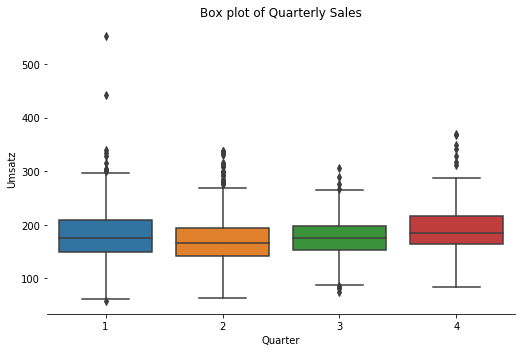

In [96]:
plt.figure(figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,2)
sns.boxplot(x="Quarter", y="Umsatz", data=prodG1)
plt.xlabel('Quarter')
plt.title('Box plot of Quarterly Sales')
sns.despine(left=True)
plt.tight_layout();